In [1]:
import os
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd

%matplotlib inline
# %matplotlib ipympl

In [2]:
# User input

# Filepath to xls file containing list of NVE site IDs to download data for
nve_site_ids_fpath = r"../../data/subcatchments_metadata/Subcatchments_existing_data_metadata.xlsx"
sheet_name = "nve_discharge"
# (This set of stations doesn't include previous versions of some of the stations,
# that have been discontinued (e.g. at Cærrogæsjokka), therefore needs revisiting)

# Parameters to download
par_ids = [1001]

# Start and end dates for download
st_dt = "1900-01-01"
end_dt = "2022-01-01"

# Download date (for file naming): current month and year
download_date = '2022-05'

# Folder to save raw downloaded data in
out_folder = '../../data/NVE/raw_download'

In [3]:
# # List all available parameters
# par_df = nivapy.da.get_nve_hydapi_parameters()
# par_df

In [4]:
# # List all stations
# stn_df = nivapy.da.get_nve_hydapi_stations()
# print(len(stn_df), "stations available.")
# stn_df.head()

In [5]:
# # Map all stations
# nivapy.spatial.quickmap(
#     stn_df, cluster=True, kartverket=True, aerial_imagery=True, popup="station_id"
# )

In [6]:
# Stations to download data for
station_ids_df = pd.read_excel(nve_site_ids_fpath, sheet_name=sheet_name, index_col=0)
stn_ids = station_ids_df.index
station_ids_df

,stasjonNavn
stasjonID,
234.14.0,Cærrogæsjokka
234.2.0,Jiesjokka
234.5.0,Njalmigoaika
234.1.0,Polmak
234.18.0,Polmak nye
234.4.0,Smalfjord
234.13.0,"Veahkkava, Iesjokka"
234.6.0,Vækkava
234.16.0,Julelv


In [7]:
data_dict = {}  # Key: stn_id, returns downloaded data

for stn_id in stn_ids:
    # Query one station at a time and add to dictionary
    df = nivapy.da.query_nve_hydapi([stn_id], par_ids, st_dt, end_dt, resolution=1440)
    data_dict[stn_id] = df
    print("Data downloaded for %s" % stn_id)

Data downloaded for 234.14.0
Data downloaded for 234.2.0
Data downloaded for 234.5.0
Data downloaded for 234.1.0
Data downloaded for 234.18.0
Data downloaded for 234.4.0
Data downloaded for 234.13.0
Data downloaded for 234.6.0
Data downloaded for 234.16.0


See here for an interpretation of the correction and quality integer values: https://hydapi.nve.no/UserDocumentation/

Quality types:
* Unknown = 0
* Uncontrolled = 1
* PrimaryControlled = 2
* SecondaryControlled = 3

Correction type indicates whether the value has been corrected. e.g.:
* 0: No changes
* 1: Manual- or ice correction
* 2: Interpolation
* 3: Value computed with models or/and other series
* 4: Daily mean computed with arithmetic mean. (Only used on series where we normally should use discharge curve)
* 13: The value is calculated based on a similar station or a station close by
* 14: The value is missing, and is only calculated based on statistical information for the data series

In [8]:
data_dict['234.14.0']

,station_id,station_name,parameter,parameter_name,parameter_name_eng,method,datetime,value,unit,correction,quality
0,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,1978-01-30 11:00:00+00:00,0.047568,m³/s,0,3
1,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,1978-01-31 11:00:00+00:00,0.047568,m³/s,0,3
2,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,1978-02-01 11:00:00+00:00,0.047568,m³/s,0,3
3,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,1978-02-02 11:00:00+00:00,0.047568,m³/s,0,3
4,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,1978-02-03 11:00:00+00:00,0.047568,m³/s,0,3
...,...,...,...,...,...,...,...,...,...,...,...
16037,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,2021-12-27 11:00:00+00:00,0.135912,m³/s,0,3
16038,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,2021-12-28 11:00:00+00:00,0.127979,m³/s,0,3
16039,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,2021-12-29 11:00:00+00:00,0.124702,m³/s,0,3
16040,234.14.0,Cærrogæsjokka,1001,Vannføring,Discharge,Mean,2021-12-30 11:00:00+00:00,0.125998,m³/s,0,3


In [11]:
# Rearrange data, save to csv
for stn_id in stn_ids:
    df = data_dict[stn_id]
    df.set_index('datetime', inplace=True, verify_integrity=True)
    # print(df.index.duplicated().sum())
    station_name = df['station_name'][0]
    print(stn_id, len(df))
    df.to_csv(os.path.join(out_folder, '%s_rawdata_downloaded_%s.csv' % (station_name, download_date)))

234.14.0 16042
234.2.0 9143
234.5.0 9082
234.1.0 39964
234.18.0 10989
234.4.0 11343
234.13.0 11769
234.6.0 17227
234.16.0 4573


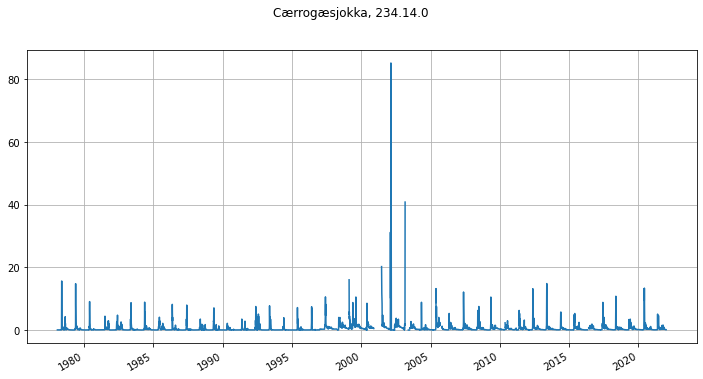

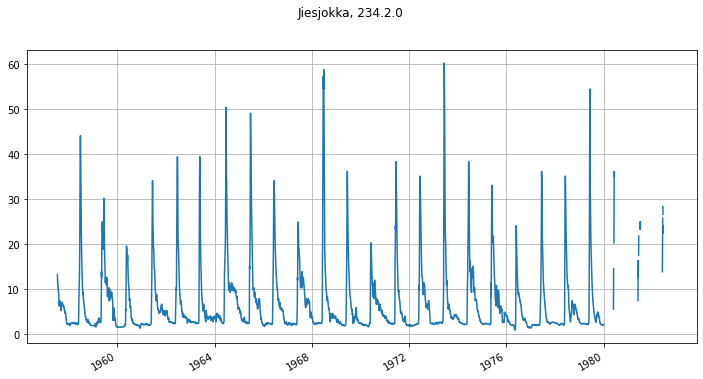

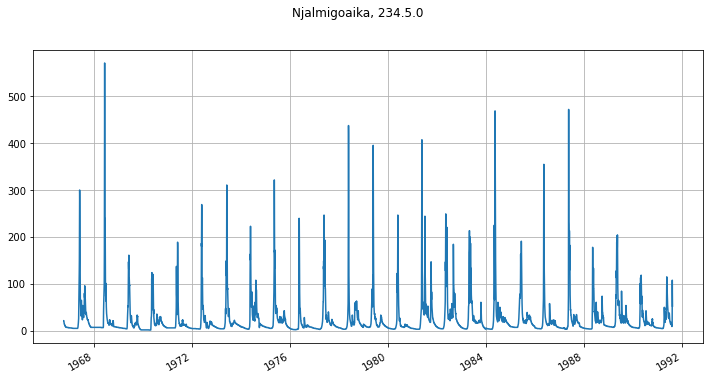

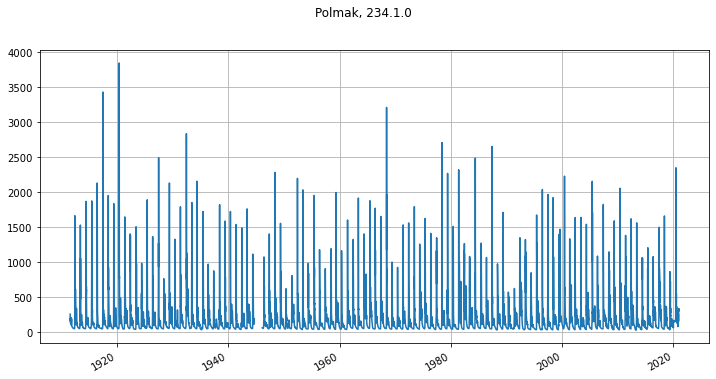

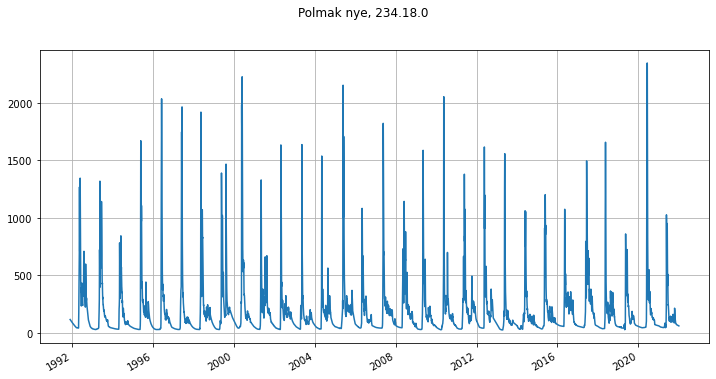

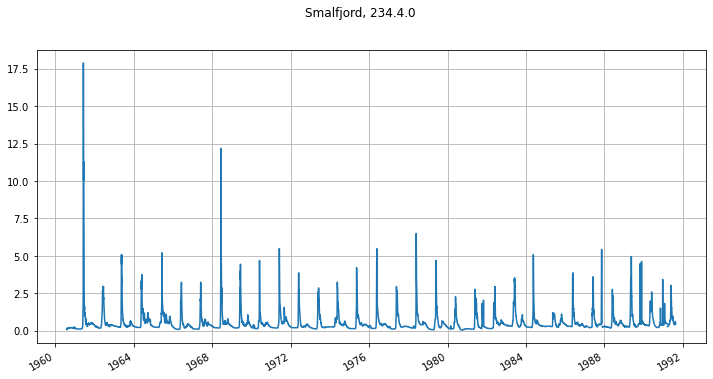

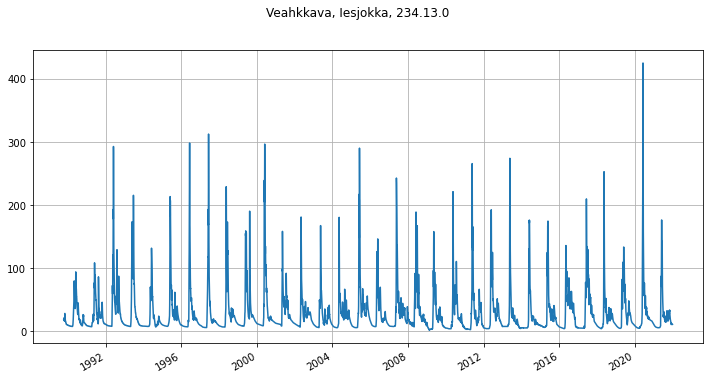

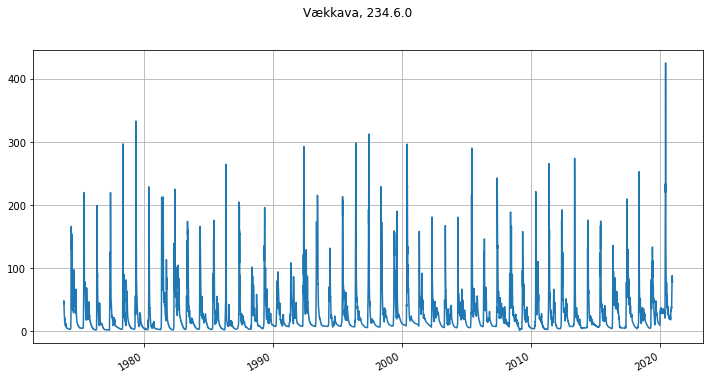

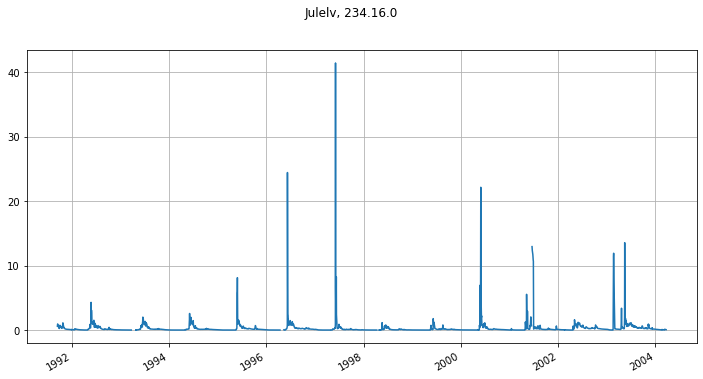

In [12]:
# Quick plots
for stn_id in stn_ids:
    ax = plt.figure(figsize=(12, 6)).add_subplot(111)
    df = data_dict[stn_id]
    station_name = df['station_name'][0]
    df['value'].plot(ax = ax)
    plt.grid(True)
    plt.xlabel('')
    plt.suptitle('%s, %s' % (station_name, stn_id))
    plt.savefig(r'../../data/NVE/raw_data_plots/%s-%s.png' % (station_name, stn_id))

In [31]:
yr_list = list(range(2000, 2022))

for stn_id in stn_ids:
    df = data_dict[stn_id]
    station_name = df['station_name'][0]

    fig = plt.figure(figsize=(12, 25))

    for i, year in enumerate(yr_list):

        ax = fig.add_subplot(len(yr_list), 1, i+1)

        df['value'].loc['%s-01-01' % year: '%s-12-31' % year].plot(ax=ax)

        plt.grid(True)
        plt.xlabel('')
        if year != 2021:
            frame1 = plt.gca()
            frame1.axes.xaxis.set_ticklabels([])
        if year == 2000:
            plt.title('%s, %s' % (station_name, stn_id))

    plt.tight_layout()
    plt.savefig(r'../../data/NVE/raw_data_plots/yr_by_yr/%s-%s_yr-by-yr.png' % (station_name, stn_id))
    plt.close()

In [12]:
# Unstack
df2 = df[["datetime", "value", "station_name"]]
# df2 = df.copy()
df2.set_index(["datetime", "station_name"], inplace=True)
df2 = df2.unstack("station_name")
df2.columns = df2.columns.droplevel(0)  # Remove multi-index on columns
df2.head()

station_name,Cærrogæsjokka,Jiesjokka,Julelv,Njalmigoaika,Polmak,Polmak nye,Smalfjord,"Veahkkava, Iesjokka"
datetime,,,,,,,,
1911-07-24 11:00:00+00:00,NaN,NaN,NaN,NaN,253.3038,NaN,NaN,NaN
1911-07-25 11:00:00+00:00,NaN,NaN,NaN,NaN,241.0981,NaN,NaN,NaN
1911-07-26 11:00:00+00:00,NaN,NaN,NaN,NaN,235.1423,NaN,NaN,NaN
1911-07-27 11:00:00+00:00,NaN,NaN,NaN,NaN,232.2008,NaN,NaN,NaN
1911-07-28 11:00:00+00:00,NaN,NaN,NaN,NaN,238.1080,NaN,NaN,NaN


In [26]:
# Plot
df2.plot(subplots=True, sharex=True, figsize=(12, 12))
plt.tight_layout()

station_name,Cærrogæsjokka,Jiesjokka,Julelv,Njalmigoaika,Polmak,Polmak nye,Smalfjord,"Veahkkava, Iesjokka"
datetime,,,,,,,,
1911-07-24 11:00:00+00:00,NaN,NaN,NaN,NaN,253.3038,NaN,NaN,NaN
1911-07-25 11:00:00+00:00,NaN,NaN,NaN,NaN,241.0981,NaN,NaN,NaN
1911-07-26 11:00:00+00:00,NaN,NaN,NaN,NaN,235.1423,NaN,NaN,NaN
1911-07-27 11:00:00+00:00,NaN,NaN,NaN,NaN,232.2008,NaN,NaN,NaN
1911-07-28 11:00:00+00:00,NaN,NaN,NaN,NaN,238.1080,NaN,NaN,NaN


In [36]:
df_stacked_fpath = r'../data/NVE/NVE_Q_download_2022-01-20_allinfo_stacked.csv'
df_unstacked_fpath = r'../data/NVE/NVE_Q_download_2022-01-20_unstacked.csv'

df.to_csv(df_stacked_fpath, index=False)
df2.to_csv(df_unstacked_fpath)

In [ ]:
df2['Cærrogæsjokka'].plot(figsize=(15,8), logy=True)
plt.grid(True)